# Visualization of a MARIDA patch with its corresponding pre-processed L1C Copernicus Hub patch
The patches I took from Copernicus Hub are larger than the ones of MARIDA. This notebook visualizes the Copernicus Hub and MARIDA patches before any processing is applied.

In [96]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
import sys
sys.path.append('../../')

In [98]:

import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

from marineanomalydetection.utils.string import number_starting_with_zero_2_number
from marineanomalydetection.io.image_io import ImageIO
from marineanomalydetection.io.tif_io import TifIO
from marineanomalydetection.imageprocessing.float32_to_uint8 import (
    float32_to_uint8,
)

In [99]:
marida_patches_path = "/data/anomaly-marine-detection/data/patches/"
cop_hub_patches_path = "/data/pyraws_luca/pyraws/generate_l1c/l1c_images"

# MARIDA excluded bands B09 and B10 => bands to use to do keypoints matching:
# B01, B02, B03, B04, B05, B06, B07, B08, B8A, B11, B12
BAND_NAMES_IN_MARIDA = ["B01", "B02", "B03", "B04", "B05", "B06", "B07", "B08", "B8A", "B11", "B12"]

number = "1"
ext = ".tif"
marida_patch_name = "S2_24-3-20_18QYF" #"S2_29-11-15_16PEC"
L1C = "_l1c_" 

band_cop_hub = "B01" # "B04"

if band_cop_hub == "B09" or band_cop_hub == "B10":
    raise Exception("MARIDA removed bands B09 and B10")
elif band_cop_hub == "B11" or band_cop_hub == "B12":
    # we subtract 2 if it is band B11 or B12 due to the removal of previous bands B09 and B10
    band_marida = int(number_starting_with_zero_2_number(band_cop_hub[-2:])) - 2
elif band_cop_hub == "B8A":
    band_marida = 8
else:   
    band_marida = int(number_starting_with_zero_2_number(band_cop_hub[-2:])) - 1

In [100]:
image_io = ImageIO()
tif_io = TifIO()

(256, 256, 11)


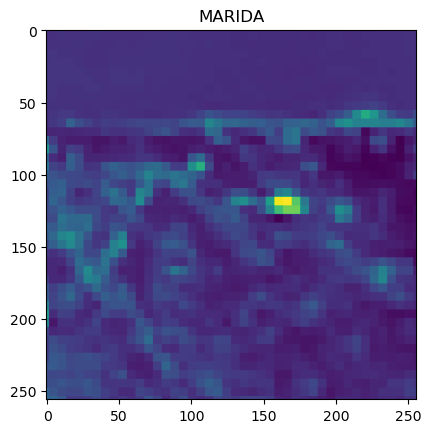

In [101]:
marida_path = os.path.join(marida_patches_path, marida_patch_name, marida_patch_name + "_" + number + ext)
img_marida, _ = tif_io.acquire_data(marida_path)
print(img_marida.shape)
plt.title("MARIDA")
plt.imshow(img_marida[:, :, band_marida])

(296, 296, 1)


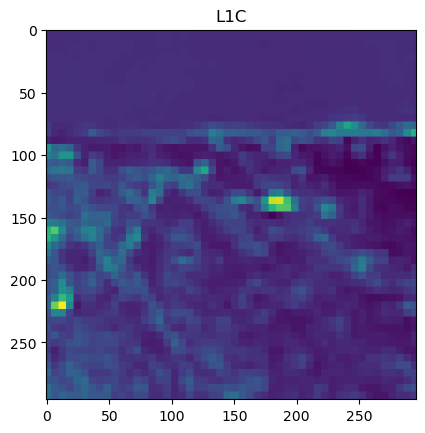

In [102]:
img_cop_hub, _ = tif_io.acquire_data(
    os.path.join(
        cop_hub_patches_path, 
        marida_patch_name, 
        marida_patch_name + "_" + number,
        marida_patch_name + "_" + number + L1C + band_cop_hub + ext)
)
print(img_cop_hub.shape)
plt.title("L1C")
plt.imshow(img_cop_hub)

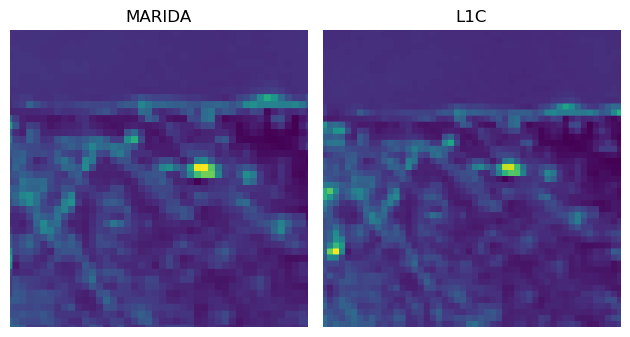

In [103]:
fig, ax = plt.subplots(1, 2)
ax[0].set_title("MARIDA")
ax[0].imshow(img_marida[:, :, band_marida] / img_marida[:, :, band_marida].max())
ax[1].set_title("L1C")
ax[1].imshow(img_cop_hub / img_cop_hub.max())
ax[0].axis('off')
ax[1].axis('off')
fig.tight_layout()
fig.savefig("after_adding_constant.pdf", bbox_inches='tight')

In [104]:

img_marida = float32_to_uint8(img_marida[:, :, band_marida])
print(img_marida.shape)
image_io.save_img(img_marida, "/data/anomaly-marine-detection/data/l1c_data/images_before_keypoint_matching/img_marida.png")

img_cop_hub = float32_to_uint8(img_cop_hub[:, :, 0])
print(img_cop_hub.shape)
image_io.save_img(img_cop_hub, "/data/anomaly-marine-detection/data/l1c_data/images_before_keypoint_matching/img_cop_hub.png")

(256, 256)
(296, 296)
